## retrieve data from material project

In [1]:
from mp_api.client import MPRester
key="Z7NcMZxFm5LyvsQZk9k7sD8ZgMdQZstr"

with MPRester(key) as mpr:
    data=mpr.materials.summary.search(formula='ABC3',fields=["structure","material_id","nelements","formula_pretty","formula_anonymous","theoretical","is_stable", "volume", "elements","band_gap","formation_energy"])
    

C:\Users\YujuL\anaconda3\envs\Group\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Retrieving SummaryDoc documents: 100%|██████████| 4555/4555 [00:07<00:00, 618.10it/s]


## Feature Engineering

In [2]:
from matminer.featurizers.bandstructure import BranchPointEnergy
from matminer.featurizers.bandstructure import BandFeaturizer
from matminer.featurizers.structure import XRDPowderPattern
import pandas as pd

In [3]:
xrd=XRDPowderPattern()

stable = []
structures = []
band_gaps = []
theory = []
ids = []
for sample in data:
    stable.append(sample.is_stable)
    structures.append(sample.structure)
    band_gaps.append(sample.band_gap)
    theory.append(sample.theoretical)
    ids.append(sample.material_id)

perov_df = pd.DataFrame(
    {"material ids": ids,
     "structure": structures,
     "band gaps": band_gaps,
     "theoretical": theory,
     "stable": stable
    })


In [4]:
real_perovs = perov_df[perov_df["theoretical"]==False]
real_perovs["stable"] = real_perovs["stable"].astype(int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
real_perovs_xrd = xrd.featurize_dataframe(real_perovs, "structure")

XRDPowderPattern: 100%|██████████| 1759/1759 [03:40<00:00,  7.98it/s]


In [6]:
y = real_perovs_xrd["stable"].values
X = real_perovs_xrd.drop(["material ids", "structure", "band gaps", "theoretical", "stable"], axis=1)

In [31]:
X

,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,xrd_8,xrd_9,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
14,2.478322e-26,7.762754e-23,1.254368e-19,1.045647e-16,4.496728e-14,9.976063e-12,1.141755e-09,6.741240e-08,2.053376e-06,3.227161e-05,...,5.480407e-07,6.226729e-08,0.000001,0.000021,0.000183,0.000939,0.002913,0.005379,0.005676,3.291362e-03
18,2.061098e-37,1.139955e-33,3.841217e-30,7.885731e-27,9.862955e-24,7.515608e-21,3.489098e-18,9.868571e-16,1.700542e-13,1.785305e-11,...,4.197247e-03,1.812563e-03,0.000485,0.000082,0.000037,0.000210,0.000945,0.002605,0.004397,4.545096e-03
19,3.359836e-86,9.774339e-80,1.554275e-73,1.350951e-67,6.418341e-62,1.666775e-56,2.365934e-51,1.835690e-46,7.785158e-42,1.804707e-37,...,4.348214e-04,2.016603e-03,0.005112,0.007084,0.005365,0.002221,0.000503,0.000062,0.000004,1.553321e-07
27,2.928741e-23,5.345314e-20,4.845123e-17,2.181101e-14,4.876252e-12,5.414225e-10,2.985573e-08,8.176556e-07,1.112315e-05,7.523033e-05,...,2.167607e-03,2.228740e-03,0.002280,0.002234,0.002503,0.002920,0.002826,0.002212,0.001436,7.567850e-04
33,4.621298e-32,1.246952e-28,2.058293e-25,2.078434e-22,1.283916e-19,4.851863e-17,1.121637e-14,1.586241e-12,1.372337e-10,7.263288e-09,...,3.968101e-03,2.866507e-03,0.002318,0.003033,0.004262,0.004524,0.003224,0.001471,0.000420,7.436288e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549,4.024008e-50,1.523183e-45,3.326686e-41,4.192162e-37,3.048112e-33,1.278764e-29,3.095396e-26,4.323233e-23,3.483916e-20,1.619919e-17,...,2.720574e-03,2.849249e-03,0.003757,0.004492,0.004112,0.003207,0.002657,0.002230,0.001485,6.783342e-04
4550,3.017360e-60,2.631816e-55,1.379515e-50,4.345677e-46,8.227486e-42,9.362137e-38,6.403264e-34,2.632495e-30,6.505725e-27,9.665152e-24,...,3.807744e-03,3.928954e-03,0.003471,0.002783,0.002942,0.003726,0.004412,0.004628,0.003932,2.427809e-03
4551,7.862720e-12,5.214322e-10,1.997782e-08,4.422047e-07,5.654886e-06,4.177818e-05,1.783201e-04,4.397200e-04,6.264369e-04,5.155901e-04,...,8.527335e-04,6.624125e-04,0.000716,0.001637,0.003429,0.004699,0.003999,0.002066,0.000637,1.160117e-04
4552,1.314500e-64,2.031345e-59,1.861787e-54,1.012046e-49,3.262827e-45,6.238962e-41,7.075469e-37,4.759081e-33,1.898524e-29,4.491948e-26,...,1.041261e-02,1.126488e-02,0.007685,0.003383,0.001215,0.001344,0.003030,0.004591,0.004151,2.227070e-03


In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
models=[]
accuracy=[]

## SVM 

In [9]:
from sklearn.svm import SVC

In [10]:
svc = SVC()

param_grid={'kernel':['linear','poly','rbf','sigmoid'],
            'degree':[1,2,3,4],
            'gamma':[0.05,0.1,0.2,0.5,0.7,1.2],
            'C':[0.1,0.2,0.3,0.4,1]
           }


In [11]:
##RandomizedSearchCV to find the best parameter

In [12]:
from sklearn.model_selection import RandomizedSearchCV

rand_ser = RandomizedSearchCV(estimator=svc,param_distributions=param_grid,n_iter=10,)
rand_ser.fit(X_train,y_train)
print(f'best parameter:{rand_ser.best_params_}')
print(f'best score:{rand_ser.best_score_}')

best parameter:{'kernel': 'rbf', 'gamma': 0.05, 'degree': 4, 'C': 1}
best score:0.5927513187451099


In [13]:
svc_model=rand_ser.best_estimator_
svc_model.fit(X_train,y_train)

SVC(C=1, degree=4, gamma=0.05)

In [14]:
from sklearn.metrics import classification_report

In [15]:
y_pred = svc_model.predict(X_test)
testing_accuracy = svc_model.score(X_test, y_test) * 100
models.append('SVC')
accuracy.append(testing_accuracy)
print(f'Accuracy on test data: {testing_accuracy:.1f} %')
print(classification_report(y_test,y_pred,zero_division=1))

Accuracy on test data: 56.5 %
              precision    recall  f1-score   support

           0       0.57      1.00      0.72       199
           1       1.00      0.00      0.00       153

    accuracy                           0.57       352
   macro avg       0.78      0.50      0.36       352
weighted avg       0.75      0.57      0.41       352



In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

grid_param={'n_estimators':range(1,1000)}

rand_ser = RandomizedSearchCV(estimator=rf,param_distributions=grid_param,n_iter=10,)
rand_ser.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'n_estimators': range(1, 1000)})

In [18]:
print(f'best parameter:{rand_ser.best_params_}')
print(f'best score:{rand_ser.best_score_}')

best parameter:{'n_estimators': 839}
best score:0.6922389641856591


In [19]:
rf_model=rand_ser.best_estimator_

In [20]:

y_pred=rf_model.predict(X_test)
testing_accuracy = rf_model.score(X_test, y_test) * 100
models.append('Randomforest')
accuracy.append(testing_accuracy)
print(f' Accuracy on test data: {testing_accuracy:.1f} %')
print(classification_report(y_test,y_pred))

 Accuracy on test data: 67.6 %
              precision    recall  f1-score   support

           0       0.66      0.88      0.75       199
           1       0.72      0.41      0.53       153

    accuracy                           0.68       352
   macro avg       0.69      0.65      0.64       352
weighted avg       0.69      0.68      0.65       352



## LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr=LogisticRegression(max_iter=1000)
grid_param={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

grid_ser = GridSearchCV(estimator=lr,param_grid=grid_param,cv=5,scoring='accuracy')
grid_ser.fit(X_train,y_train)

print(f'best parameter:{grid_ser.best_params_}')
print(f'best score:{grid_ser.best_score_}')

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


best parameter:{'C': 100, 'solver': 'lbfgs'}
best score:0.6439110572676107


The max_iter was reached which means the coef_ did not converge


In [22]:
lr_model=grid_ser.best_estimator_
lr_model.fit(X_train, y_train)
y_pred=lr_model.predict(X_test)
testing_accuracy = lr_model.score(X_test, y_test) * 100
models.append('LogisticRegression')
accuracy.append(testing_accuracy)
print(f' Accuracy on test data: {testing_accuracy:.1f} %')
print(classification_report(y_test,y_pred))

 Accuracy on test data: 63.9 %
              precision    recall  f1-score   support

           0       0.63      0.87      0.73       199
           1       0.67      0.33      0.45       153

    accuracy                           0.64       352
   macro avg       0.65      0.60      0.59       352
weighted avg       0.65      0.64      0.61       352



## XGBoost

In [23]:
import xgboost as xgb

In [24]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
testing_accuracy = xgb_model.score(X_test, y_test) * 100
models.append('XGBoost')
accuracy.append(testing_accuracy)
print(f' Accuracy on test data: {testing_accuracy:.1f} %')
print(classification_report(y_test,y_pred))

 Accuracy on test data: 68.2 %
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       199
           1       0.67      0.54      0.59       153

    accuracy                           0.68       352
   macro avg       0.68      0.66      0.67       352
weighted avg       0.68      0.68      0.68       352



## Decision Trees

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
testing_accuracy = dt_model.score(X_test, y_test) * 100
models.append('DecisionTree')
accuracy.append(testing_accuracy)
print(f' Accuracy on test data: {testing_accuracy:.1f} %')
print(classification_report(y_test,y_pred))

 Accuracy on test data: 64.2 %
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       199
           1       0.59      0.57      0.58       153

    accuracy                           0.64       352
   macro avg       0.63      0.63      0.63       352
weighted avg       0.64      0.64      0.64       352



## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
testing_accuracy = knn_model.score(X_test, y_test) * 100
models.append('KNN')
accuracy.append(testing_accuracy)
print(f' Accuracy on test data: {testing_accuracy:.1f} %')
print(classification_report(y_test,y_pred))

 Accuracy on test data: 67.6 %
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       199
           1       0.68      0.48      0.56       153

    accuracy                           0.68       352
   macro avg       0.68      0.65      0.65       352
weighted avg       0.68      0.68      0.66       352



In [29]:
import matplotlib.pyplot as plt

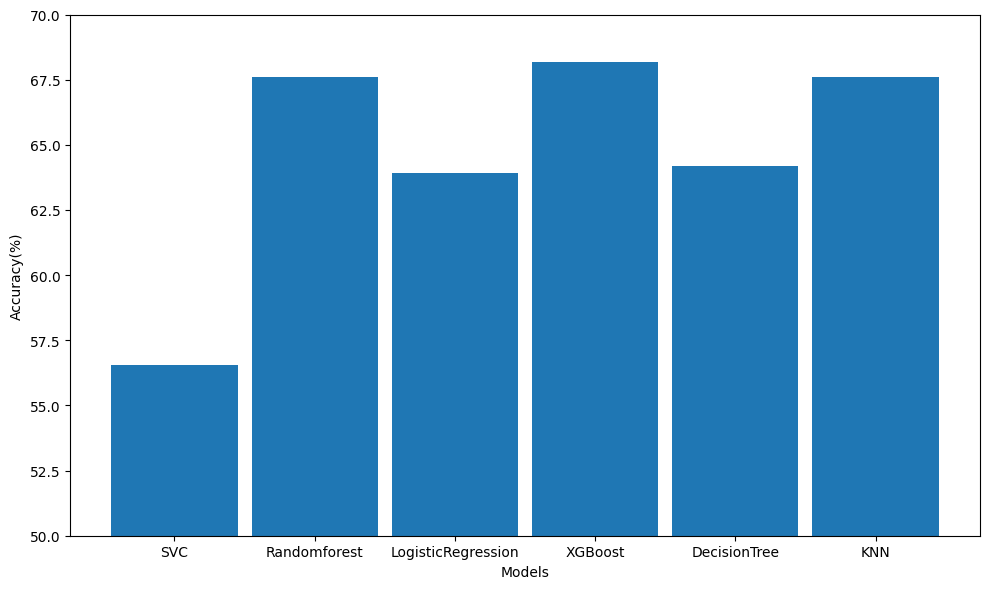

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(models,accuracy,width=0.9)
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')
plt.ylim(50, 70)
plt.tight_layout()
plt.show()